# IFT 4030 / 7030, Machine Learning for Signal Processing, Lab 2

In this lab we will cover material from lecture 2. You will be asked questions related to the material we covered during the lecture.

This lab counts 1% towards your final grade. Each question will be graded in a binary way. If the code works, and follows the requirements you will get full credit, if not no credit will be given. If you are above 50%, you get full points for the whole lab, if below, you will only leave with what you learn. (if you are below 50%, you will get 0% towards your final grade)

This is supposed to individual work. So you are not supposed to collaborate with other students, or copy other people's code. It's okay to talk with others for ideas, but you are supposed write your code individually.

You can use pytorch or numpy. But I recommend that you use pytorch as it will serve you better in the rest of the class!

If you do not have a google (gmail) account, you will not be able run the cells. So get one! Also, make sure you create a local copy, so that you can save your work, and then you can upload your work on teams. After you are happy with your work, upload your work on 'Lab 2' in teams. Have a nice lab!

-----------------------

Dans ce laboratoire, nous couvrirons le matériel du cours 2. Questions vous seront posées liées au matériel que nous avons couvert pendant le cours.

Ce laboratoire compte 1 % dans votre note finale. Chaque question sera notée de manière binaire. Si le code fonctionne et respecte les exigences, vous obtiendrez l'intégralité du crédit, sinon aucun crédit ne sera accordé. Si vous êtes au dessus de 50%, vous obtenez la totalité des points pour l'ensemble du laboratoire, si en dessous, vous ne repartirez qu'avec ce que vous avez appris. (Si vous êtes en dessous de 50%, vous obtiendrez 0% vers votre note finale)

Ceci est censé être un travail individuel. Vous n’êtes donc pas censé collaborer avec d’autres étudiants ni copier le code d’autres personnes. C'est bien de discuter avec les autres pour trouver des idées, mais vous êtes censé écrire votre code individuellement.

Vous pouvez utiliser pytorch ou numpy. Mais je vous recommande d'utiliser pytorch car il vous servira mieux dans le reste de la classe!

Si vous n'avez pas de compte google (gmail), vous ne pourrez pas exécuter les cellules. Alors obtenez-en un! Assurez-vous également de créer une copie locale, afin de pouvoir enregistrer votre travail, puis de télécharger votre travail sur Teams. Une fois que vous êtes satisfait de votre travail, téléchargez votre travail sur 'Lab 2' en teams. Je vous souhaite un beau laboratoire!



# Question 1: Probability Tables for Markov Chains (60pt)

A Markov Chain defines a probability distribution over sequences by defining a state transition probability matrix. That is, the state transition matrix defines a conditional probability table $p(s_{t+1}|s_t)$, where $s_t \in \{1, \dots, K \}$ is the state of the Markov chain at time $t$.

## Question 1a: Define the transition matrix (20pt)

Define a state transition matrix of size 5 such that
$$p(s_{t+1}=i | s_t = j) = 1-\epsilon, \; \text{for}  \; \; i = j,$$
$$p(s_{t+1}=mod(i+1, 5) | s_t = i) =\epsilon,$$
$$p(s_{t+1}= i | s_t = j) = 0 \; \text{for} \; \; i \neq j.$$
Example: If you are at state $s_t = 1$. The probability of staying at the same state such that $s_{t+1}=1$ is $1-\epsilon$ and transitioning to $s_{t+1}=2$ is $\epsilon$, and there is no chance of transitioning to $s_{t+1}=3$, or further. When you reach state 5, there is only chance of either staying at the same state, or going back to state 1.

Define this conditional probability matrix in a matrix such that columns give the next state probabilities. Set $\epsilon = 0.2$. Print the result with the `print()` function.

Hint: Use `torch.eye(5)` to make things easier.

##############################################

# Question 1 : Tableaux de probabilité pour les chaînes de Markov (60 pt)

Une chaîne de Markov définit une distribution de probabilité sur des séquences en définissant une matrice de probabilité de transition d'état. Autrement dit, la matrice de transition d'état définit une table de probabilité conditionnelle $p(s_{t+1}|s_t)$, où $s_t \in \{1, \dots, K \}$ est l'état de la chaîne de Markov à temps $t$.

## Question 1a : Définir la matrice de transition (20pt)

Définir une matrice de transition d'état de taille 5 telle que
$$p(s_{t+1}=i | s_t = j) = 1-\epsilon, \; \text{pour} \; \; i = j,$$
$$p(s_{t+1}=mod(i+1, 5) | s_t = i) =\epsilon,$$
$$p(s_{t+1}= i | s_t = j) = 0 \; \text{pour} \; \; i \neq j.$$
Exemple : Si vous êtes à l'état $s_t = 1$. La probabilité de rester dans le même état tel que $s_{t+1}=1$ est $1-\epsilon$ et de passer à $s_{t+1}=2$ est $\epsilon$, et il n'y a pas chance de passer à $s_{t+1}=3$, ou plus. Lorsque vous atteignez l’état 5, il n’y a qu’une seule chance soit de rester dans le même état, soit de revenir à l’état 1.

Définissez cette matrice de probabilité conditionnelle dans une matrice telle que les colonnes donnent les probabilités d'état suivantes. Définissez $\epsilon = 0.2$. Imprimez le résultat avec la fonction `print()`.

Astuce : utilisez `torch.eye(5)` pour rendre les choses plus faciles.



In [1]:
import torch

##### travaillez ici

EPSILON = 0.2
transition_matrix = torch.eye(5) * (1 - EPSILON)
for i in range(5):
    transition_matrix[i, (i + 1) % 5] = EPSILON
print(transition_matrix)


tensor([[0.8000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.8000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.8000]])


# Question 1b: Plot $p(s_{t+1})$ (30pt)

Note that $p(s_{t+1}) = \sum_{s_t} p(s_{t+1} | s_t) p(s_t)$. Having this in mind, start from  $p(s_t) = [1, 0, 0 ,0 ,0]$, and plot the evolution of the vector $p(s_{t+1})$ across time (for $t \in \{0, \dots, 30 \})$.

Hint: For plotting, you can use `plot.imshow()` or `plt.plot()`. For `plt.plot`, you can input of a matrix of size $31 \times 5$.

#################################

Notez que $p(s_{t+1}) = \sum_{s_t} p(s_{t+1} | s_t) p(s_t)$. En gardant cela à l'esprit, partez de $p(s_t) = [1, 0, 0 ,0 ,0]$ et tracez l'évolution du vecteur $p(s_{t+1})$ dans le temps (pour $t \in \{0, \dots, 30 \})$.

Astuce : Pour le traçage, vous pouvez utiliser `plot.imshow()` ou `plt.plot()`. Pour `plt.plot`, vous pouvez saisir une matrice de taille $31 \times 5$.


Text(0.5, 1.0, 'Evolution of the probabilities of the states over time')

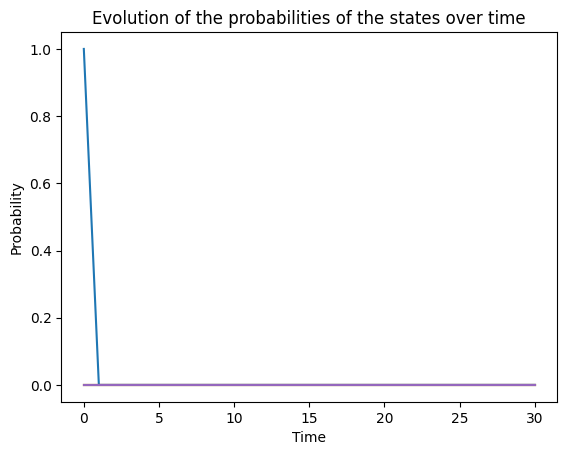

In [19]:
import matplotlib.pyplot as plt

##### travaillez ici
p_0 = torch.tensor([1, 0, 0, 0, 0])
probalities_St1 = torch.zeros((31,5))

for t in range(31):
    if t == 0:
        probalities_St1[t] = p_0
    else:
        transition_matrix @ probalities_St1[t-1].float() 
        

plt.plot(probalities_St1.numpy())
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Evolution of the probabilities of the states over time')


# Question 1c: Calculate the principal eigenvector of $p(s_{t+1} | s_t)$ (10pt).

Do an eigenanalysis of the matrix $p(s_{t+1} | s_t)$. Verify that $p(s_{30})$, that you calculated in cell above is very close the principal eigenvector.

Hint: For this matrix principal eigenvector is the eigenvector that corresponds to the eigenvalue that is equal to 1. Note that the eigenvector that you find  might have a different scale, but it should point to a direction that is close.  

*For those who are curious:* The principal eigenvector of the Markov transition matrix ($p(s_{t+1} | s_t)$) gives the stationary distribution (the distribution that the chain converges)

######################

Faites une analyse propre de la matrice $p(s_{t+1} | s_t)$. Vérifiez que $p(s_{30})$, que vous avez calculé dans la cellule ci-dessus, est très proche du vecteur propre principal.

Astuce : pour cette matrice, le vecteur propre principal est le vecteur propre qui correspond à la valeur propre égale à 1. Notez que le vecteur propre que vous trouvez peut avoir une échelle différente, mais il doit pointer vers une direction proche.

*Pour ceux qui sont curieux :* Le vecteur propre principal de la matrice de transition de Markov ($p(s_{t+1} | s_t)$) donne la distribution stationnaire (la distribution que cette chaîne converge)


In [49]:
##### travaillez ici

L_complex, V_complex = torch.linalg.eig(transition_matrix)
print(V_complex)
real_eigen=V_complex[0].real
norm=torch.norm(real_eigen, p=1)
real_eigen_normalised=real_eigen/norm
print(real_eigen_normalised)

print(torch.cosine_similarity(real_eigen_normalised, probalities_St1[30].float(), dim=0))



tensor([[ 0.4472+0.0000j,  0.4472-0.0000j,  0.4472+0.0000j,  0.4472-0.0000j,
          0.4472+0.0000j],
        [-0.3618+0.2629j, -0.3618-0.2629j,  0.1382+0.4253j,  0.1382-0.4253j,
          0.4472+0.0000j],
        [ 0.1382-0.4253j,  0.1382+0.4253j, -0.3618+0.2629j, -0.3618-0.2629j,
          0.4472+0.0000j],
        [ 0.1382+0.4253j,  0.1382-0.4253j, -0.3618-0.2629j, -0.3618+0.2629j,
          0.4472+0.0000j],
        [-0.3618-0.2629j, -0.3618+0.2629j,  0.1382-0.4253j,  0.1382+0.4253j,
          0.4472+0.0000j]])
tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
tensor(0.)


# Question 2: Estimating the mean of a Gaussian (40pt)

Reproduce slide 45. of lecture 2.

Create a dataset of size $N=5000$, where $x_n \sim \mathcal N(x_n; DATA, \sigma^2 I)$, where $DATA$ is the image of data we use regularly in the class and $\sigma^2 = 9$ is the variance of the distribution. After generating this noisy data, estimate the mean of these samples different values of $N$. (same as what we show in the slides).

If you correctly generate the data this will give you 20 points.
If you correctly estimate mean parameter for different $N$, you will earn 20 more points.

###################

Reproduisez la diapositive 45. du cours 2.

Créez un ensemble de données de taille $N=5000$, où $x_n \sim \mathcal N(x_n; DATA, \sigma^2 I)$, où $DATA$ est l'image des données que nous utilisons régulièrement dans la classe et $\ sigma^2 = 9$ est la variance de la distribution. Après avoir généré ces données bruitées, estimez la moyenne de ces échantillons différentes valeurs de $N$. (identique à ce que nous montrons dans les diapositives).

Si vous générez correctement les données, cela vous donnera 20 points.
Si vous estimez correctement le paramètre moyen pour différents $N$, vous gagnerez 20 points supplémentaires.

In [ ]:
!wget https://sourceseparationresearch.com/static/mlsp_data/data.png
import torchvision

out = torchvision.io.read_image('data.png')
im = out[:, ::20, ::20].float()

im = im.mean(0)
im = im / im.max()

##### travaillez ici


--2023-09-22 15:08:35--  https://sourceseparationresearch.com/static/mlsp_data/data.png
Resolving sourceseparationresearch.com (sourceseparationresearch.com)... 35.182.36.80, 3.98.163.142
Connecting to sourceseparationresearch.com (sourceseparationresearch.com)|35.182.36.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 645425 (630K) [image/png]
Saving to: ‘data.png.2’

data.png.2          100%[===================>] 630.30K  1.45MB/s    in 0.4s    

2023-09-22 15:08:36 (1.45 MB/s) - ‘data.png.2’ saved [645425/645425]

